In [1]:
import os
from os.path import join
import sys
import numpy as np
import glob
import pathlib

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from torch.utils.data import DataLoader,Dataset
from torchvision import transforms
from pathlib import Path
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data.dataset import Subset
import matplotlib.pyplot as plt
%matplotlib inline
from src import simple_model as sm

In [2]:
model=sm.Model().to('cpu')
model.load_state_dict(torch.load("src/Celeb_Smile_dict.pth"))

<All keys matched successfully>

In [3]:
model.to('cpu')

Model(
  (c0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (c1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (c2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=50176, out_features=4, bias=True)
)

In [4]:
img=Image.open("data/00_smiling_male/100901.jpg")

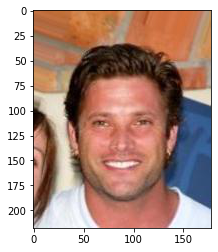

In [5]:
plt.imshow(img)

In [6]:
transform = transforms.Compose([transforms.Resize(224),transforms.CenterCrop(224),
                                transforms.ToTensor()])
img=transform(img)

In [7]:
img.shape
img=np.array(img)
img_=img[np.newaxis]
print(img_.shape)
print(img_)

(1, 3, 224, 224)
[[[[0.63529414 0.6392157  0.6431373  ... 0.7607843  0.78039217
    0.78039217]
   [0.60784316 0.60784316 0.60784316 ... 0.7647059  0.78039217
    0.78039217]
   [0.5882353  0.58431375 0.58431375 ... 0.76862746 0.78039217
    0.78039217]
   ...
   [0.36862746 0.38039216 0.3882353  ... 0.21960784 0.21568628
    0.20784314]
   [0.37254903 0.38039216 0.4117647  ... 0.27450982 0.24313726
    0.23529412]
   [0.3882353  0.39215687 0.44705883 ... 0.39215687 0.3137255
    0.3019608 ]]

  [[0.38039216 0.38039216 0.38039216 ... 0.5411765  0.56078434
    0.56078434]
   [0.38039216 0.38039216 0.3764706  ... 0.54509807 0.56078434
    0.56078434]
   [0.39215687 0.3882353  0.38431373 ... 0.54509807 0.56078434
    0.56078434]
   ...
   [0.25882354 0.27058825 0.27450982 ... 0.30980393 0.30980393
    0.30588236]
   [0.2627451  0.27058825 0.3019608  ... 0.36078432 0.3372549
    0.3254902 ]
   [0.2784314  0.28235295 0.3372549  ... 0.4745098  0.4
    0.3882353 ]]

  [[0.22745098 0.23137255 

In [8]:
img=torch.from_numpy(img_)
result=model(img)
result

tensor([[ 27.5668,  14.6870, -16.5542, -25.4927]], grad_fn=<AddmmBackward>)

In [13]:
cls=torch.argmax(result)
if cls == 0:
    print("笑顔")
elif cls ==1:
    print("真顔")

笑顔
